In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


# Reading and Reviewing the Dataset

In [32]:
dataset = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Converting the class names into numerical Labels
We convert the class names into numerical labels so that it is easier to feed them into the models

In [34]:
mapper = {'Iris-setosa' : 0, 'Iris-virginica' : 1, 'Iris-versicolor' : 2}
dataset['species'] = dataset['species'].map(mapper)
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [35]:
dataset.info()
dataset = dataset.sample(frac=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Split the Dataset
We split the dataset into training and test splits

In [36]:
train_x = dataset.iloc[:100, :4]
train_y = dataset.iloc[:100, 4:]
test_x = dataset.iloc[100:, :4]
test_y = dataset.iloc[100:, 4:]

train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()

In [37]:
train_y = np.ravel(train_y)
test_y = np.ravel(test_y)

# Rnadom Forest Classifier Algorithm
First off, we'll see the performance of the Random forest classifier algorithm which, as the name suggests, is a classification algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(150)
rfc_model.fit(train_x, train_y)
rfc_predictions = rfc_model.predict(test_x)

correct, wrong, total = 0, 0, 0
for actual, predicted in zip(test_y, rfc_predictions):
    if actual == predicted:
        correct += 1
    else:
        wrong += 1
    total += 1
    
print(f"Out of {total}, {correct} were predicted correctly and {wrong} were predicted wrong and the accuracy was {(correct/total)*100}%")

Out of 50, 49 were predicted correctly and 1 were predicted wrong and the accuracy was 98.0%


# Support Vector Machine
Now we will use the support vector machine algorithm. In specific we are going to use the support vector classification algorithm

In [39]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(train_x, train_y)
svc_predictions = svc_model.predict(test_x)

correct, wrong, total = 0, 0, 0
for actual, predicted in zip(test_y, svc_predictions):
    if actual == predicted:
        correct += 1
    else:
        wrong += 1
    total += 1
    
print(f"Out of {total}, {correct} were predicted correctly and {wrong} were predicted wrong and the accuracy was {(correct/total)*100}%")

Out of 50, 50 were predicted correctly and 0 were predicted wrong and the accuracy was 100.0%


# Visualizing the Dataset
The dataset consists of four features. We can attempt to visualize the dataset in order to get an idea of how the different classes are formed.For this purpose we will plot a 3 dimensional graph with matplotlib

We plot each label with a seperate color so we first divide the features on the basis of labels

In [40]:
s_len_setosa = []
p_len_setosa = []
p_width_setosa = []

s_len_virginica = []
p_len_virginica = []
p_width_virginica = []

s_len_versicolor = []
p_len_versicolor = []
p_width_versicolor = []

for x in range(len(test_x)):
    if test_y[x] == 0:
        s_len_setosa.append(test_x[x][0])
        p_len_setosa.append(test_x[x][1])
        p_width_setosa.append(test_x[x][2])
    elif test_y[x] == 1:
        s_len_virginica.append(test_x[x][0])
        p_len_virginica.append(test_x[x][1])
        p_width_virginica.append(test_x[x][2])
    else:
        s_len_versicolor.append(test_x[x][0])
        p_len_versicolor.append(test_x[x][1])
        p_width_versicolor.append(test_x[x][2])

Plotting the graph

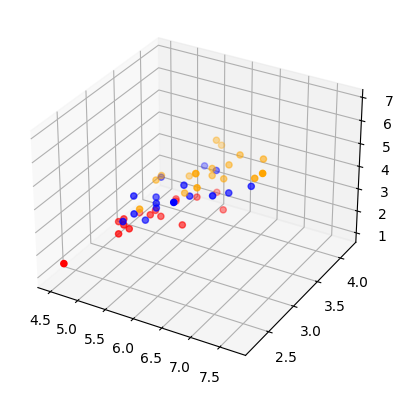

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(s_len_versicolor, p_len_versicolor, p_width_versicolor, color='blue')
ax.scatter(s_len_virginica, p_len_virginica, p_width_virginica, color='orange')
ax.scatter(s_len_setosa, p_len_setosa, p_width_setosa, color='red')
plt.show()

# Neural Network
We are also going to design a simple neural network just to practice and see hoe it performs on the dataset provided

In [42]:
train_x = dataset.iloc[:100, :4]
train_y = dataset.iloc[:100, 4:]
test_x = dataset.iloc[100:, :4]
test_y = dataset.iloc[100:, 4:]

train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()

In [43]:
import tensorflow as tf
nn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(None,4), batch_size=10),
    tf.keras.layers.Dense(128, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='LeakyReLU'),
    tf.keras.layers.Dense(3, activation='softmax')
])
nn_model.compile(metrics=['accuracy'], loss='sparse_categorical_crossentropy', optimizer='adam')
nn_model.fit(train_x, train_y, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 3ms/step - loss: 1.1969 - accuracy: 0.4200
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 1.0129 - accuracy: 0.3500
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.5500
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.6400
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.7400
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7300
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.7300
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7900
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.8000
Epoch 11/50
4/4 [======================

In [44]:
nn_predictions = nn_model.predict(test_x)
nn_predictions = np.argmax(nn_predictions, axis=1)
nn_predictions

2/2 [==============================] - 0s 4ms/step


array([2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       1, 0, 2, 2, 1, 1])

In [45]:
correct, wrong, total = 0, 0, 0
for actual, predicted in zip(test_y, nn_predictions):
    if actual == predicted:
        correct += 1
    else:
        wrong += 1
    total += 1
    
print(f"Out of {total}, {correct} were predicted correctly and {wrong} were predicted wrong and the accuracy was {(correct/total)*100}%")

Out of 50, 49 were predicted correctly and 1 were predicted wrong and the accuracy was 98.0%
